In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[Click here for my Analysis](#summary-my-thoughts-on-movie-durations)

### Task 1 Loading the CSV file into DataFrame

In [22]:
netflix_df = pd.read_csv('netflix_data.csv')
print(netflix_df)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

### Task 2 Filter and remove the rows with 'TV Shows' genre

### Genres Checking
- Checking first the unique genres out of thousands of rows, to understand what are the genres that exist in the dataframe
- Get the total number of rows (with all genres) and count()
- Checking the number of rows with genre as "TV Shows" and sum()
- Check what are the other genres available and sum()
- "netflix_subset" -> should contain the dataframe where the genre of 'TV Shows' is removed 


In [23]:
unique_genres = netflix_df['genre'].unique()
for i , genre in enumerate(unique_genres, start = 1):
    print(f"Genre {i}: {genre}")
print(unique_genres)

Genre 1: International TV
Genre 2: Dramas
Genre 3: Horror Movies
Genre 4: Action
Genre 5: Crime TV
Genre 6: Documentaries
Genre 7: Independent Movies
Genre 8: Comedies
Genre 9: Sports Movies
Genre 10: Anime Series
Genre 11: Reality TV
Genre 12: TV Comedies
Genre 13: Docuseries
Genre 14: Uncategorized
Genre 15: British TV
Genre 16: International Movies
Genre 17: Sci-Fi
Genre 18: Kids
Genre 19: Children
Genre 20: TV Shows
Genre 21: Classic Movies
Genre 22: Thrillers
Genre 23: Stand-Up
Genre 24: Anime Features
Genre 25: Music
Genre 26: TV Dramas
Genre 27: TV Horror
Genre 28: TV Action
Genre 29: Classic
Genre 30: Romantic TV
Genre 31: Cult Movies
Genre 32: TV Sci
Genre 33: Romantic Movies
Genre 34: Spanish-Language
Genre 35: LGBTQ Movies
['International TV' 'Dramas' 'Horror Movies' 'Action' 'Crime TV'
 'Documentaries' 'Independent Movies' 'Comedies' 'Sports Movies'
 'Anime Series' 'Reality TV' 'TV Comedies' 'Docuseries' 'Uncategorized'
 'British TV' 'International Movies' 'Sci-Fi' 'Kids' '

In [24]:
# Checking the number of rows: all genre -> tv shows + other genre
all_genre_rows = netflix_df['genre'].count()
tv_shows_genre_rows = (netflix_df['genre'] == 'TV Shows' ).sum()
other_genre_rows = (netflix_df['genre'] != 'TV Shows' ).sum()

In [25]:
#print to check
print(all_genre_rows)
print(tv_shows_genre_rows)
print(other_genre_rows)
print(netflix_df[['genre']] == 'TV Shows' ) #returns Dataframe: stating boolean True if it is TV Show
print(type(netflix_df[['genre']] == 'TV Shows') ) #confirms that it is a dataframe ; single bracket will return pandas series

7787
12
7775
      genre
0     False
1     False
2     False
3     False
4     False
...     ...
7782  False
7783  False
7784  False
7785  False
7786  False

[7787 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [26]:
# Removing the 'TV Shows' genre
netflix_subset = netflix_df.drop(netflix_df[netflix_df['genre'] == 'TV Shows'].index)
print(f"Updated number of rows with removed genre of TV Shows: {netflix_subset.shape[0]}")
print(netflix_subset.count())
for index, genre in enumerate(netflix_subset['genre'].unique()):
    print(f"Genre {index} : {genre}")

Updated number of rows with removed genre of TV Shows: 7775
show_id         7775
type            7775
title           7775
director        5390
cast            7061
country         7273
date_added      7765
release_year    7775
duration        7775
description     7775
genre           7775
dtype: int64
Genre 0 : International TV
Genre 1 : Dramas
Genre 2 : Horror Movies
Genre 3 : Action
Genre 4 : Crime TV
Genre 5 : Documentaries
Genre 6 : Independent Movies
Genre 7 : Comedies
Genre 8 : Sports Movies
Genre 9 : Anime Series
Genre 10 : Reality TV
Genre 11 : TV Comedies
Genre 12 : Docuseries
Genre 13 : Uncategorized
Genre 14 : British TV
Genre 15 : International Movies
Genre 16 : Sci-Fi
Genre 17 : Kids
Genre 18 : Children
Genre 19 : Classic Movies
Genre 20 : Thrillers
Genre 21 : Stand-Up
Genre 22 : Anime Features
Genre 23 : Music
Genre 24 : TV Dramas
Genre 25 : TV Horror
Genre 26 : TV Action
Genre 27 : Classic
Genre 28 : Romantic TV
Genre 29 : Cult Movies
Genre 30 : TV Sci
Genre 31 : Romant

### Task 3: Investigate Columns, then create another subset with specific columns
- Check the name of existing columns. Turns out there are 11 columns.
- Create another subset again called "netflix_movies", this time this subset has the specific columns of:
  - "title", "country", "genre", "release_year", "duration"
  - as you can see, only 5 out of 11 columns will be kept for this subset, so you gotta filter these 5 and remove the other columns for this subset

In [27]:
print(netflix_subset.columns)   
for index, column in enumerate(netflix_subset.columns.unique(), start=1):
    print(f"Column {index}: {column}")

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')
Column 1: show_id
Column 2: type
Column 3: title
Column 4: director
Column 5: cast
Column 6: country
Column 7: date_added
Column 8: release_year
Column 9: duration
Column 10: description
Column 11: genre


In [28]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]

for index, column in enumerate(netflix_movies.columns.unique(), start=1):
    print(f"Column {index}: {column}")

Column 1: title
Column 2: country
Column 3: genre
Column 4: release_year
Column 5: duration


In [29]:
print(f"Number of rows in netflix_movies dataframe: {netflix_movies.shape[0]}")
print(f"Number of columns in the netflix_movies dataframe: {netflix_movies.shape[1]}")

Number of rows in netflix_movies dataframe: 7775
Number of columns in the netflix_movies dataframe: 5


### Task 4 Short_movies subset
- Filter the netflix_movies dataframe, to get only the short movies, with strictly less than 60 minutes in duration

In [30]:
short_movies = netflix_movies[netflix_movies['duration'] < 60 ]
print(short_movies)

                      title    country             genre  release_year  \
0                        3%     Brazil  International TV          2020   
5                        46     Turkey  International TV          2016   
11                     1983     Poland          Crime TV          2018   
12                     1994     Mexico          Crime TV          2019   
16                   Feb-09        NaN  International TV          2018   
...                     ...        ...               ...           ...   
7775             Zoids Wild      Japan      Anime Series          2018   
7777            Zombie Dumb        NaN              Kids          2018   
7779              Zona Rosa     Mexico  International TV          2019   
7784      Zulu Man in Japan        NaN     Documentaries          2019   
7785  Zumbo's Just Desserts  Australia  International TV          2019   

      duration  
0            4  
5            1  
11           1  
12           1  
16           1  
...      

In [31]:
print(f"Number of rows in short_movies dataframe: {short_movies.shape[0]}")
print(f"Number of columns in the short_movies dataframe: {short_movies.shape[1]}")

Number of rows in short_movies dataframe: 2818
Number of columns in the short_movies dataframe: 5


### Task 5 : For Loop and Matplotlib
- To Do:
  - Use if/else statements OR Loop through the rows of netflix_movies, assigning different colors for 4 genres ['Children', 'Documentaries', 'Stand-Up', 'Other']. Save the results in "colors" list.
  - Initialize matplotlib figure called "fig"
  - Create a scatter plot for movie duration by release year using the "colors" list to color the point
  - x-axis label : "Release year"
  - y-axis label : "Duration (min)"
  - title : "Movie Duration by Year of Release"

In [32]:
colors = []

for index, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('yellow')
    elif row['genre'] == 'Documentaries':
        colors.append('orange')
    elif row['genre'] == 'Stand-Up':
        colors.append('red')
    else:
        colors.append('green')

print(colors)

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'orange', 'green', 'orange', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'orange', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green

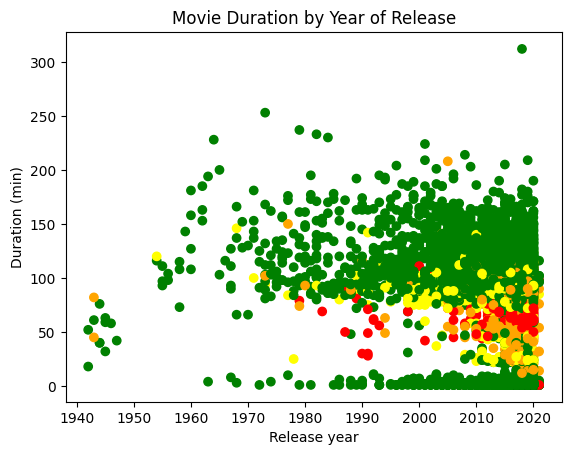

In [33]:
fig = plt.figure()

# Create a scatter plot for movie duration by release year using the "colors" list to color the points
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)

# x-axis label
plt.xlabel('Release year')

# y-axis label
plt.ylabel('Duration (min)')

# Title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

### Task 6 : Yes or No
- To Do:
  - Create a variable called "answer" 
  - This variable should answer the question: "Are we certain that movies are getting shorter?"

In [34]:
# Calculate the average duration for each release year
average_duration_by_year = netflix_movies.groupby('release_year')['duration'].mean()

# Check if the average duration is decreasing over the years
if average_duration_by_year.idxmax() == average_duration_by_year.iloc[-1]:
    answer = "No, we are not certain that movies are getting shorter."
else:
    answer = "Yes, we are certain that movies are getting shorter."

print(answer)

Yes, we are certain that movies are getting shorter.


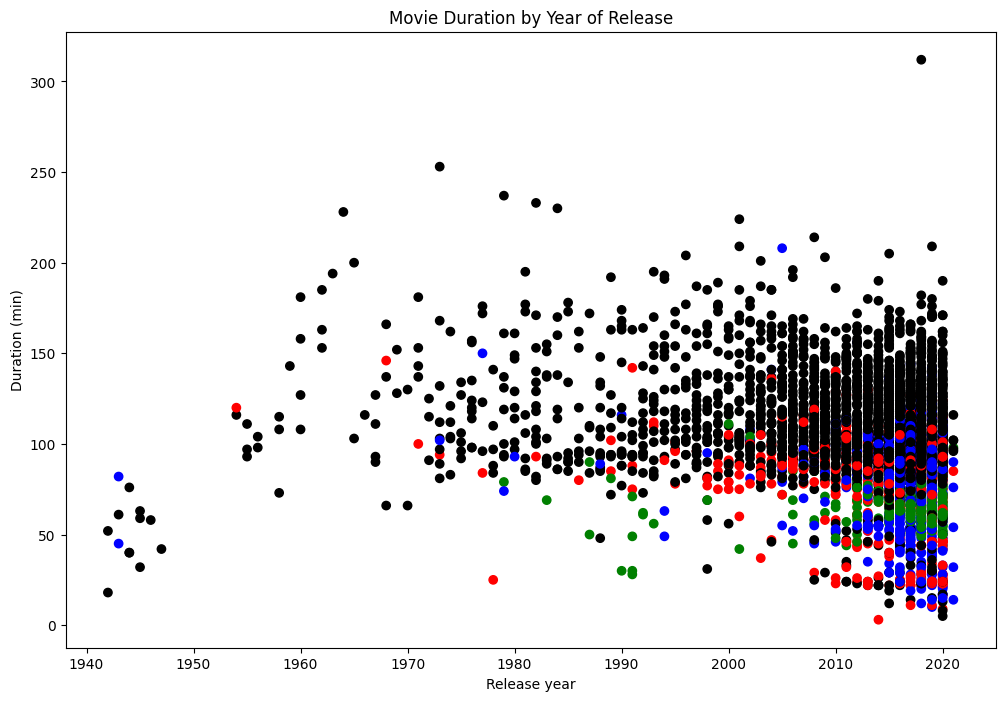

In [35]:
#Solution from datacamp for comparison purposes
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

# Filter for durations shorter than 60 minutes
short_movies = netflix_movies[netflix_movies.duration < 60]

# Define an empty list
colors = []

# Iterate over rows of netflix_movies
for label, row in netflix_movies.iterrows() :
    if row["genre"] == "Children" :
        colors.append("red")
    elif row["genre"] == "Documentaries" :
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[:10]

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

# Are we certain that movies are getting shorter?
answer = "no"

# My Analysis and Reflection : Netflix Movie Duration activity
As we explore the analysis of Netflix movie durations using the provided dataset, the coding tasks offer valuable opportunities to master data organization and manipulation techniques using Python tools like data frames and pyplot. Acquiring skills in extracting meaningful visualizations and manipulating data is particularly beneficial for managers, like myself, who rely on accurate business data to make informed decisions.

### Summary Report: 

* **Clarification on Movie Duration Trends:** The author's response simply stating "no" to the question "Are we certain that movies are getting shorter?" lacked the necessary depth of explanation, leading to ambiguity. It is crucial to provide a more thorough explanation to enhance the learner's comprehension and confidence in the analysis.

* **Personal Perspective:** Reflecting on my analysis, I lean towards affirming a "yes" response rather than just agreeing with the author's "no". The graph evidence supports the notion that movies are indeed getting shorter, as illustrated by the clear downward trend in average durations (refer to the accompanying graph). However, I remain open to alternative viewpoints and eagerly anticipate additional insights from DataCamp to enrich my learning experience.

* **Graphical Representation Enhancement:** From a managerial standpoint, I support adopting a different graph format, such as a simplified graph displaying averages, to improve clarity and facilitate more informed decision-making regarding the task at hand. The current scatter plot suffers from overlapping points, hindering its ability to accurately address the task.

### Recommendations:
* Provide a comprehensive explanation regarding the movie duration trends to enhance clarity and understanding of the analyses.
* Consider adopting a simpler graph format to enhance visual interpretation and decision-making.
* Foster ongoing dialogue and exploration of alternative perspectives to enrich the learning journey.
* Augment analysis with additional data sources, such as Netflix data, to strengthen arguments and validate findings.

Implementing these recommendations might optimize the analysis of movie durations and ensure a more comprehensive and enlightening learning experience for all stakeholders involved.

### My Supporting Graph:
Below is the plotted graph illustrating the average duration of Netflix movies per release year. These results support the observed trend, further reinforcing the argument for decreasing movie durations.


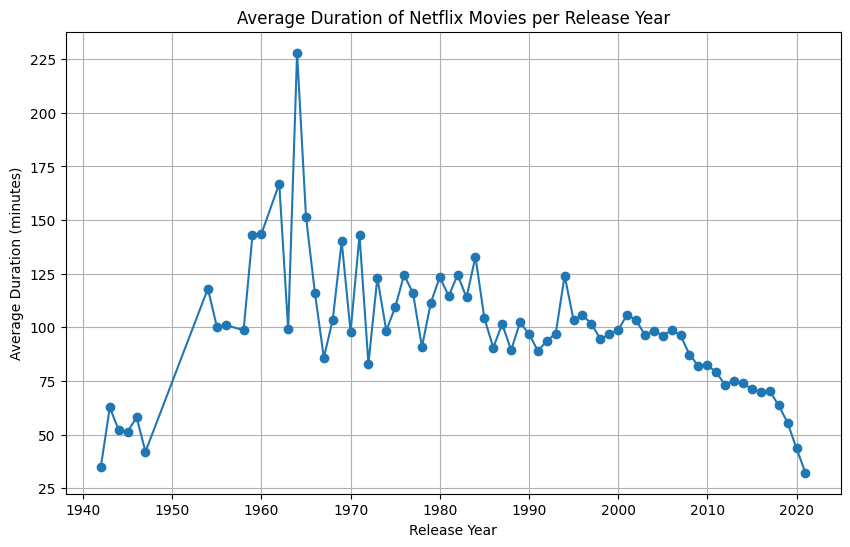

In [37]:
try:
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(average_duration_by_year.index, average_duration_by_year.values, marker='o', linestyle='-')
    plt.title('Average Duration of Netflix Movies per Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Duration (minutes)')
    plt.grid(True)
    plt.show()

except Exception as e:
    print("An error occurred:", e)